# 06 Time series analysis

This practical is based on the blog post:
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/?#

here we're going to reproduce that post.

Some code is provided. 

**Your task is to copy over and convert code from the blog post.** 


**You will run into errors and your task is to fix them.**

Some code on that page is still in python 2 and will raise errors. Other code uses outdated versions of `pandas` and `statsmodels` or other packages. As a data scientists who actively uses the web as a resource (as you should) you need to be aware of this and know how to fix it.

An error that you will run into when copying code from that post is the following:

`SyntaxError: Missing parentheses in call to 'print'. Did you mean print(g)?`

This is due to the fact that we are running Python 3, where `print` is a function and arguments must be put in parentheses. 

You can fix this by add the parentheses to the print statement.

Other solutions can be found by reading the documentation of the commands that fail, and by searching the web for error messages.

## Getting started

Normally, the blog site requires you to log in to see the beginning of the tutorial. We have provided that bit of code below so you don't need an account.


## Download and prepare data

In [1]:
from statsmodels.tsa import seasonal
#import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

### Load the data

In [2]:
import pandas as pd
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


You never go wrong with an initial plot:

<Axes: >

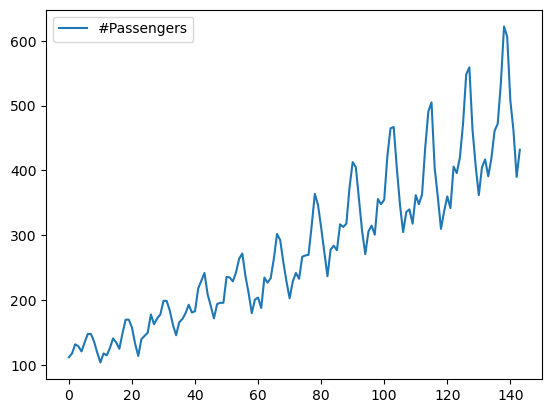

In [3]:
data.plot()

Notice that the x-axis has no label and doesn't seem to parse the month info.

Let's look at the datatypes:

In [4]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

`Month` is an object, but it should be a date. Let's convert it:

Now we need to set this as the index of the DataFrame:

In [5]:
# Convert the 'Month' column to datetime format
data_ind = pd.DatetimeIndex(data['Month'])

In [6]:
data['Month'] = data_ind
data.set_index('Month', inplace=True)
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

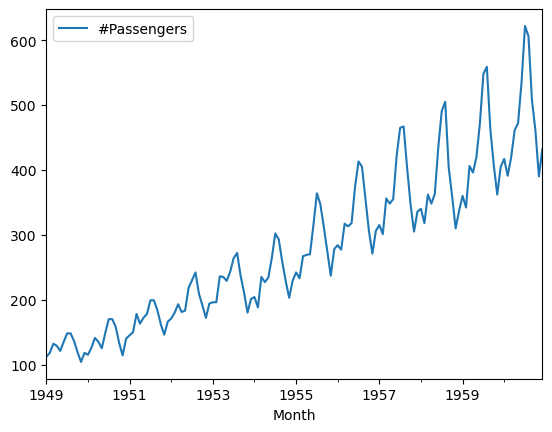

In [7]:
#Finally, let's plot it again:
data.plot()

Notice how the month is now automatically annotated on the X-Axis, because we used the proper format.

## Over to you!!

Go to the [blog post](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/?#) and work through the topics provided there, in the following order:

### 3. How to Check Stationarity of a Time Series?

In [8]:
ts = data['#Passengers']
ts.head(5)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [9]:
#Specific the index as a string constant:
ts['1949-01-01']

112

In [10]:
from datetime import datetime
ts[datetime(1949,1,1)]

112

In [11]:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [12]:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [13]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

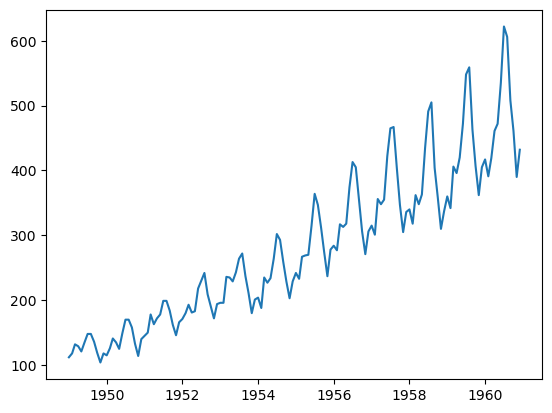

In [14]:
plt.plot(ts)

### 4. How to make a Time Series Stationary?

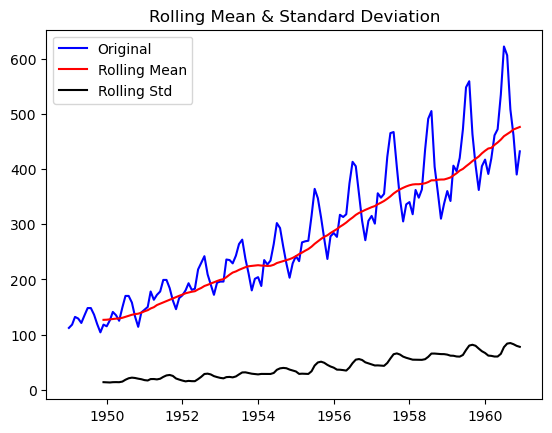

In [15]:
### add your code here...
import pandas as pd
import matplotlib.pyplot as plt

def test_stationarity(timeseries):
    
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

# Call the function with your time series data (ts)
test_stationarity(ts)

### 5. Forecasting a Time Series

Note: The blog post uses an older version of `statsmodels`, where the ARIMA was implemented differently. If your `statsmodels` version is 12.0 or greater, then you will have to do two things:

1. where the blog post says `from statsmodels.tsa.arima_model import ARIMA`, you will have to use `from statsmodels.tsa.arima.model import ARIMA` (note the dot in place of the underscore)
2. where the blog post says `model = ARIMA(ts_log, order=(2, 1, 0))` or something similar, you must use `ts_log_diff` instead of `ts_log`, and the second parameter of the `order_` argmument must be zero instead of 1 (e.g. `order=(2,0,0)` instead of `order=(2,1,0)`. 

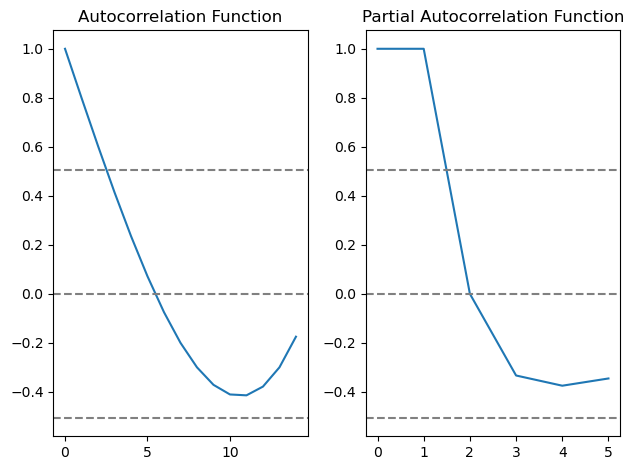

C:\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


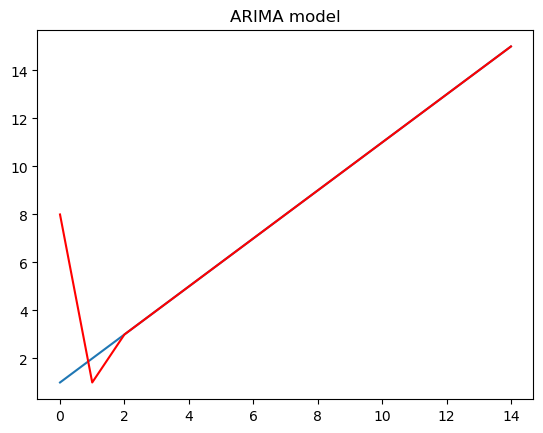

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

# Assuming ts_log_diff is a Pandas Series representing differenced log-transformed time series
# You need to replace 'your_time_series_data_here' with your actual time series data
ts_log_diff =  np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])  

# Calculate ACF and PACF
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=5, method='ols')

# Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

# Fit ARIMA model
model = ARIMA(ts_log_diff, order=(2, 0, 0))  # Adjusted order parameter
results_ARIMA = model.fit()

# Plotting the ARIMA predictions
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('ARIMA model')
plt.show()


# That's it!

We leave out the part with R. 

You have successfully learnt how to check stationarity of a time series, how to make a timeseries stationary, and how to do a forecast. Congratulations!